In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.formula.api as smf
from lazypredict.Supervised import LazyRegressor
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor, plot_tree

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering


In [66]:
data = pd.read_csv("Mall_Customers.csv")

In [67]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


## Cleaning

In [69]:
nulls_p = (data.isna().sum()/len((data)))*100
nulls_p = nulls_p.reset_index()
nulls_p.columns = ["Column","Percentage"]
nulls_p

,Column,Percentage
0,CustomerID,0.00
1,Gender,0.00
2,Age,0.00
3,Annual Income (k$),0.00
4,Spending Score (1-100),0.00


In [70]:
duplicated = data.duplicated()
num_duplicated = duplicated.sum()
print(f'There are {num_duplicated} duplicate rows')

There are 0 duplicate rows


In [71]:
# For exploring data we don't need Customer ID feature

data.drop(['CustomerID'],axis=1, inplace=True)

## Explore

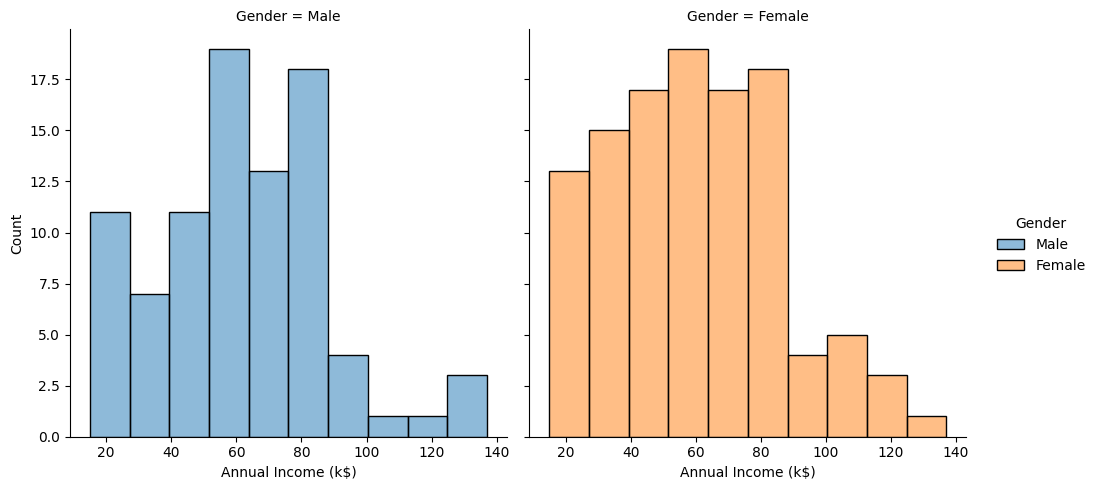

In [72]:
# Display distribution of income variable stratified by gender

sns.displot(data=data, x='Annual Income (k$)', hue='Gender', col='Gender')
plt.show()

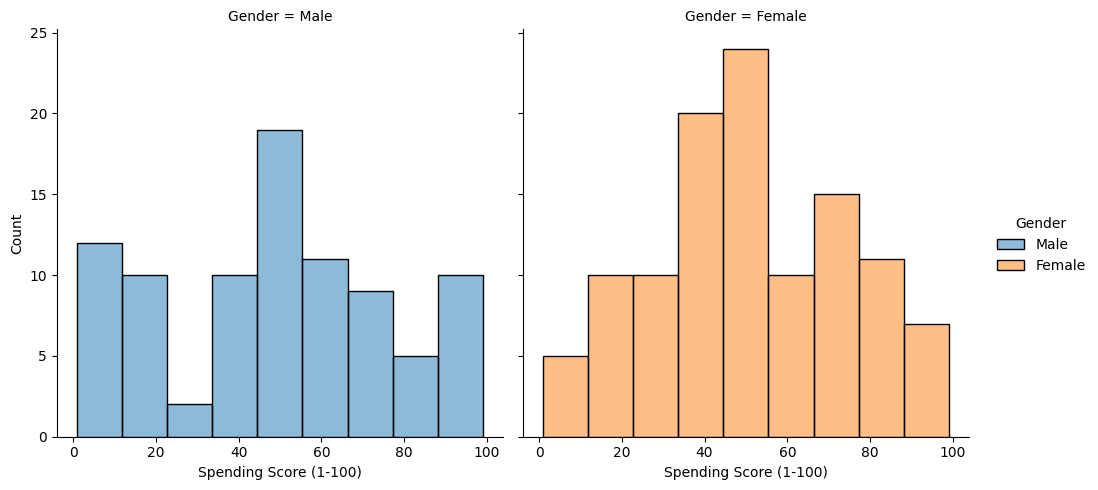

In [73]:
# Display distribution of target variable stratified by gender

sns.displot(data=data, x='Spending Score (1-100)', hue='Gender', col='Gender')
plt.show()

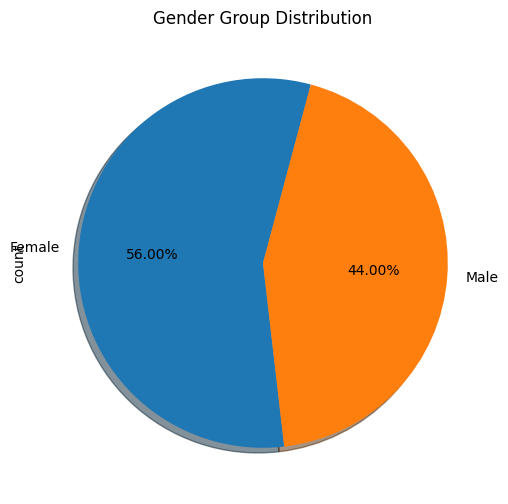

In [74]:
# Display the group of gender

data.Gender.value_counts().plot(kind='pie',shadow='True' ,autopct='%1.2f%%', startangle = 75,figsize=(6,6))
plt.title('Gender Group Distribution')
plt.show()

## Working in predictions

In [75]:
# Display summary statistics

data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,200.00,38.85,13.97,18.00,28.75,36.00,49.00,70.00
Annual Income (k$),200.00,60.56,26.26,15.00,41.50,61.50,78.00,137.00
Spending Score (1-100),200.00,50.20,25.82,1.00,34.75,50.00,73.00,99.00


In [76]:
# Seperate columns by data type

num_data = data[['Age','Annual Income (k$)','Spending Score (1-100)']]
cat_data = data[['Gender']]

<Axes: >

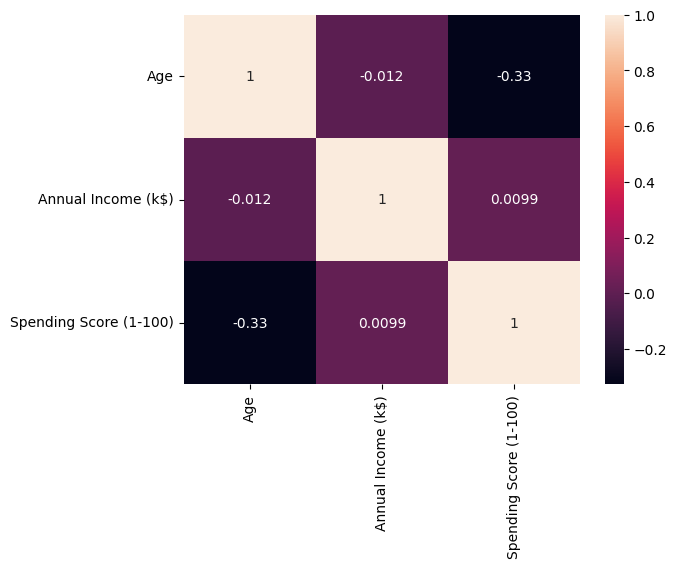

In [77]:
# Display Pearson Correlations

corr_matrix = num_data.corr()
sns.heatmap(corr_matrix,annot=True)

In [78]:
# Fit a basic OLS regression

mod = smf.ols(formula="Q('Spending Score (1-100)')~Gender + Q('Annual Income (k$)')",data=data).fit()
print(mod.summary())

                                 OLS Regression Results                                
Dep. Variable:     Q('Spending Score (1-100)')   R-squared:                       0.004
Model:                                     OLS   Adj. R-squared:                 -0.007
Method:                          Least Squares   F-statistic:                    0.3510
Date:                         Mon, 28 Aug 2023   Prob (F-statistic):              0.704
Time:                                 21:43:15   Log-Likelihood:                -933.19
No. Observations:                          200   AIC:                             1872.
Df Residuals:                              197   BIC:                             1882.
Df Model:                                    2                                         
Covariance Type:                     nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

In [79]:
# Evaluate model performances

data['Gender'] = data['Gender'].map({'Male':0,'Female':1})
X = data.drop(columns='Spending Score (1-100)')
y = data['Spending Score (1-100)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)
models.head()

 62%|██████▏   | 26/42 [00:00<00:00, 34.22it/s]

QuantileRegressor model failed to execute
Solver interior-point is not anymore available in SciPy >= 1.11.0.


100%|██████████| 42/42 [00:01<00:00, 35.38it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000029 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 72
[LightGBM] [Info] Number of data points in the train set: 140, number of used features: 3
[LightGBM] [Info] Start training from score 51.364286
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
LGBMRegressor,0.34,0.38,19.30,0.02
HistGradientBoostingRegressor,0.34,0.37,19.40,0.06
AdaBoostRegressor,0.27,0.31,20.37,0.07
RandomForestRegressor,0.22,0.26,20.97,0.16
BaggingRegressor,0.22,0.26,21.04,0.04


In [80]:
# Evaluate model performances

data['Gender'] = data['Gender'].map({'Male':0,'Female':1})
X = data.drop(columns='Spending Score (1-100)')
y = data['Spending Score (1-100)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)
models.head()

  0%|          | 0/42 [00:00<?, ?it/s]

 81%|████████  | 34/42 [00:00<00:00, 32.93it/s]

QuantileRegressor model failed to execute
Solver interior-point is not anymore available in SciPy >= 1.11.0.


100%|██████████| 42/42 [00:01<00:00, 38.56it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000021 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 69
[LightGBM] [Info] Number of data points in the train set: 140, number of used features: 2
[LightGBM] [Info] Start training from score 51.364286
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
LGBMRegressor,0.35,0.39,19.14,0.02
HistGradientBoostingRegressor,0.34,0.38,19.31,0.06
KNeighborsRegressor,0.32,0.35,19.71,0.01
RandomForestRegressor,0.20,0.24,21.28,0.15
BaggingRegressor,0.20,0.24,21.36,0.03


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000020 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 69
[LightGBM] [Info] Number of data points in the train set: 140, number of used features: 2
[LightGBM] [Info] Start training from score 51.364286
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

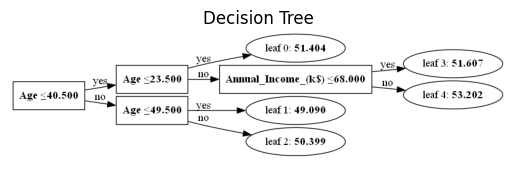

In [81]:
# Evaluate the best model

lgbm = LGBMRegressor().fit(X_train,y_train)
print('R-Squared Score: ',lgbm.score(X_test,y_test), '\n')
plot_tree(lgbm)
plt.title('Decision Tree')
plt.show()

## Clustering

In [89]:
features = data[data.columns[1:4]]

# Normalize the numeric features so they're on the same scale
scaled_features = MinMaxScaler().fit_transform(features[data.columns[1:4]])


# Get two principal components
pca = PCA(n_components=2).fit(scaled_features)
features_2d = pca.transform(scaled_features)
features_2d[0:10]

array([[-0.19222109,  0.31968276],
       [-0.45817502, -0.01815154],
       [ 0.05256189,  0.55185363],
       [-0.40235654, -0.01423909],
       [-0.03164753,  0.15557819],
       [-0.40950435,  0.00685933],
       [ 0.26210486,  0.35572776],
       [-0.52164192, -0.13927039],
       [ 0.6886636 , -0.00272803],
       [-0.26989987, -0.06757168]])

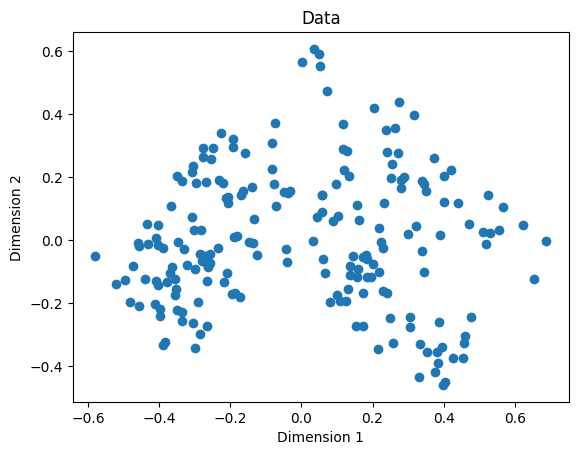

In [83]:
# Visualize in a graph

plt.scatter(features_2d[:,0],features_2d[:,1])
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.title("Data")
plt.show()

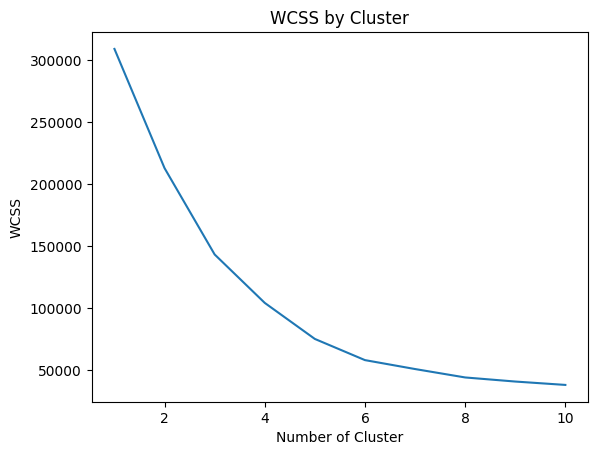

In [90]:
# Create 10 models with 1 to 10 cluster 
wcss = []
for i in range(1,11):
    Kmeans = KMeans(n_clusters=i)
    #fit the data poitns
    Kmeans.fit(features.values)
    #Get the WCSS(inertia) value
    wcss.append(Kmeans.inertia_)

# plot the WCSS values anto a line graph
plt.plot(range(1,11),wcss)
plt.title("WCSS by Cluster")
plt.xlabel("Number of Cluster")
plt.ylabel("WCSS")
plt.show()

In [91]:
# Create a model based on 4 centroids
model = KMeans(n_clusters=4, init='k-means++', n_init=100, max_iter=1000)
# Fit to the data and predict the cluster assignments for each data point
km_clusters = model.fit_predict(features.values)
# View the cluster assignments
km_clusters

array([3, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3,
       1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

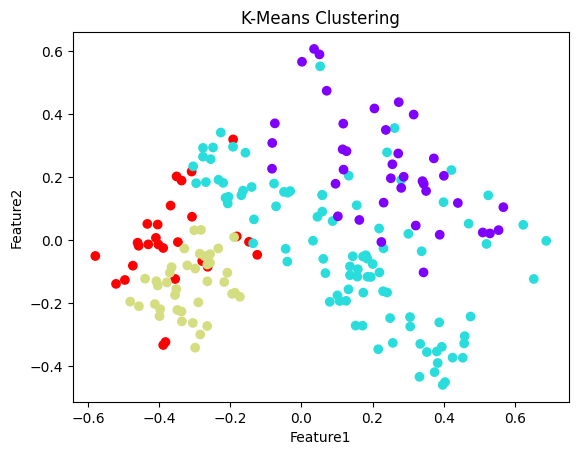

In [92]:
# Visualize in a graph the clusters found

plt.scatter(features_2d[:,0],features_2d[:,1], c=km_clusters, cmap='rainbow')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.title('K-Means Clustering')
plt.show()

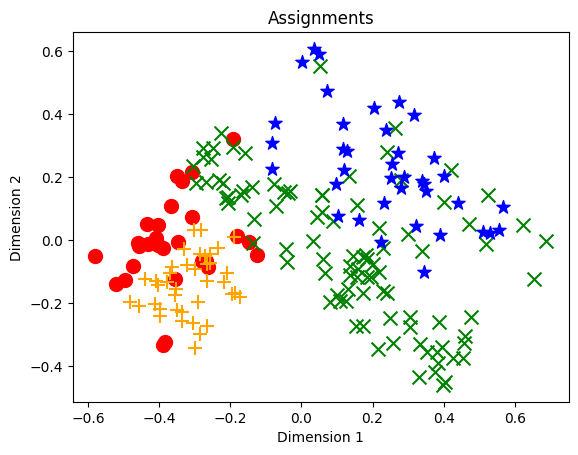

In [95]:
# Visualize in a graph the clusters found using another type of graph

def plot_clusters(samples, clusters):
    col_dic = {0: 'blue', 1: 'green', 2: 'orange', 3: 'red'}
    mrk_dic = {0: '*', 1: 'x', 2: '+', 3: 'o'}
    colors = [col_dic[x] for x in clusters]
    markers = [mrk_dic[x] for x in clusters]
    for sample in range(len(clusters)):
        plt.scatter(samples[sample][0], samples[sample][1], color=colors[sample], marker=markers[sample], s=100)
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.title('Assignments')
    plt.show()

plot_clusters(features_2d, km_clusters)


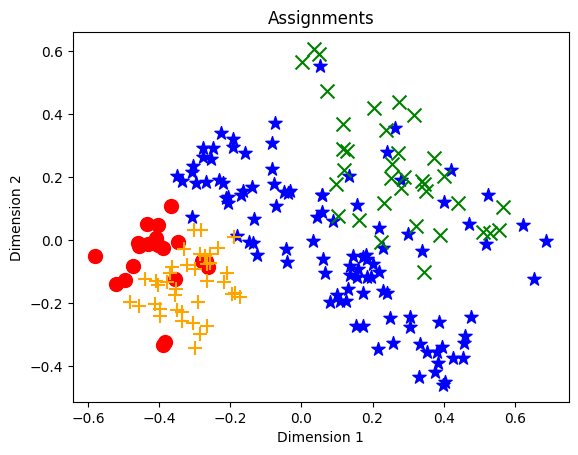

In [97]:
# Using Hierarchical Clustering

agg_model = AgglomerativeClustering(n_clusters=4)
agg_clusters = agg_model.fit_predict(features.values)
agg_clusters

plot_clusters(features_2d, agg_clusters)